# Import Library and Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

plt.style.use('seaborn-dark')

In [2]:
path = '/Users/GerendChristopher/Projects/Iris/dataset/iris.data'
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
df = pd.read_csv(path, names=names)
df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Dataset Info

In [3]:
# checking rows and columns of the dataset

print(f'dataset have {df.shape[0]} rows and {df.shape[1]} columns')

dataset have 150 rows and 5 columns


In [4]:
# datasets overall info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


As we can see from two informations above, there is no null values in the dataset

In [5]:
# the distribution of the class

df.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

Each of the class has the same number of instances

In [6]:
# numerical statistical summary

df.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Visualization

<Figure size 432x288 with 0 Axes>

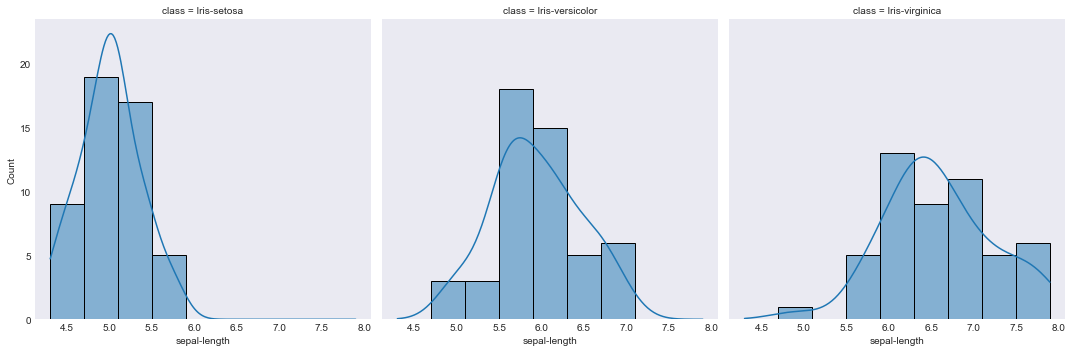

<Figure size 432x288 with 0 Axes>

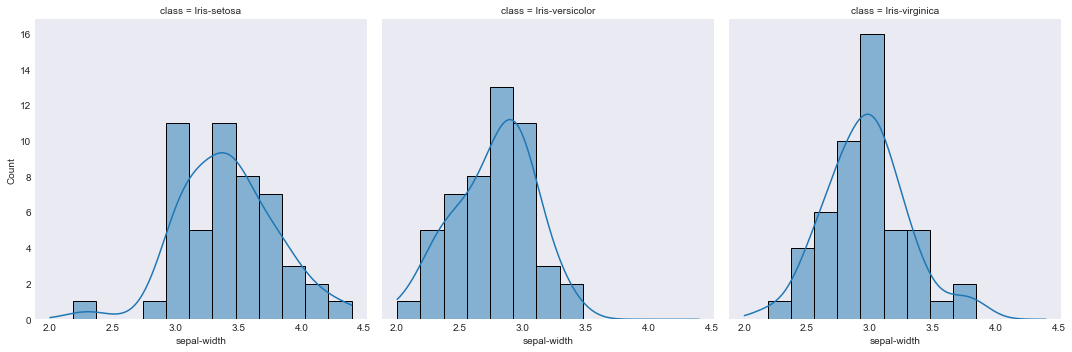

<Figure size 432x288 with 0 Axes>

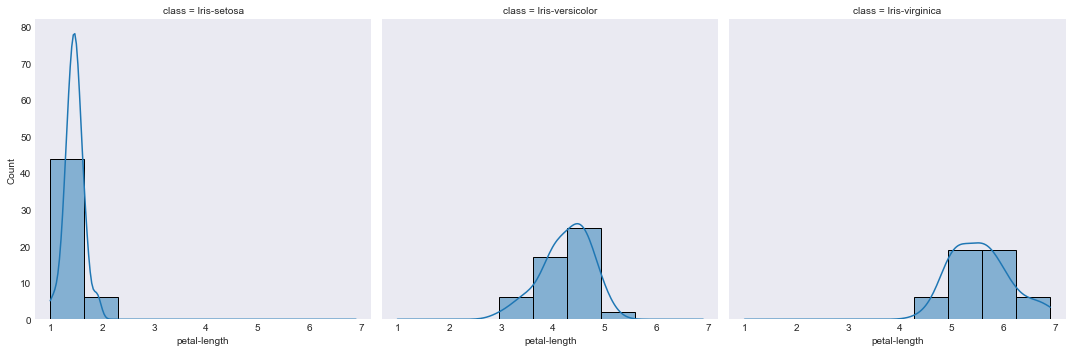

<Figure size 432x288 with 0 Axes>

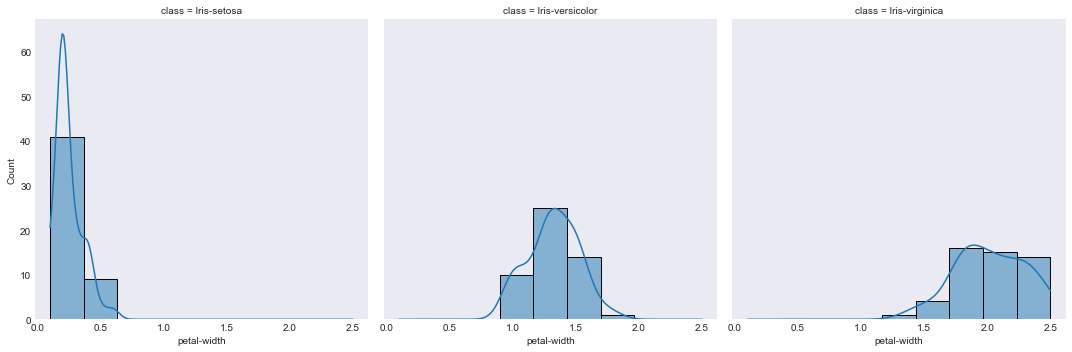

In [7]:
# distribution each attribute grouped by class

plt.figure()
sns.displot(data=df, x='sepal-length', col='class', kde=True)
plt.figure()
sns.displot(data=df, x='sepal-width', col='class', kde=True)
plt.figure()
sns.displot(data=df, x='petal-length', col='class', kde=True)
plt.figure()
sns.displot(data=df, x='petal-width', col='class', kde=True)

Text(0.5, 0.98, 'Distributions of Attributes By Class')

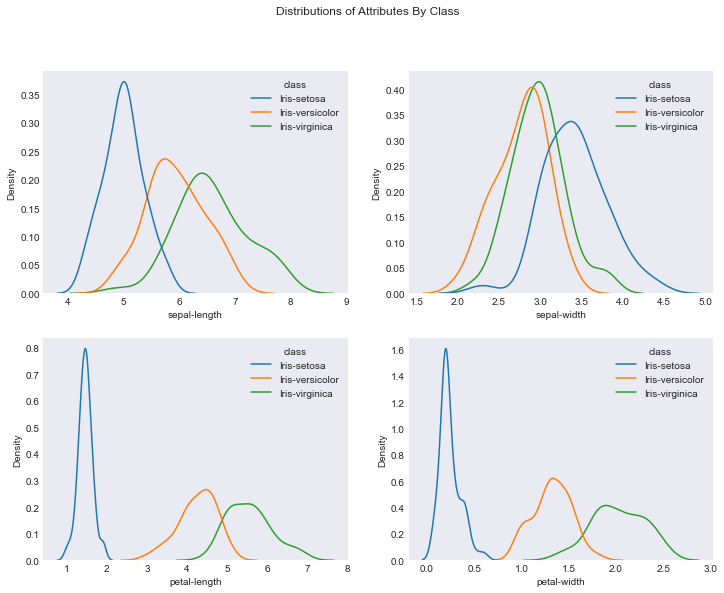

In [8]:
# combining attributes distribution grouped by class

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,9))

sns.kdeplot(data=df, x='sepal-length', hue='class', ax=ax[0][0])
sns.kdeplot(data=df, x='sepal-width', hue='class', ax=ax[0][1])
sns.kdeplot(data=df, x='petal-length', hue='class', ax=ax[1][0])
sns.kdeplot(data=df, x='petal-width', hue='class', ax=ax[1][1])

fig.suptitle('Distributions of Attributes By Class')

<AxesSubplot:ylabel='class-None'>

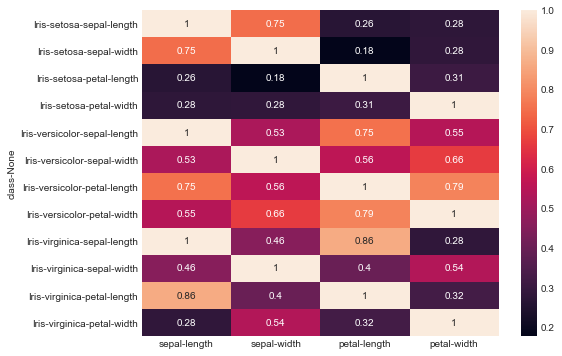

In [9]:
# checking linear correlation among attributes grouped by class

plt.figure(figsize=(8,6))
sns.heatmap(df.groupby('class').corr(), annot=True)

# Evaluating Some Models

In [10]:
# split the dataset

X = df.drop(columns='class')
y = df['class']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=42)

In [11]:
# spot-check algorithms

models = [('LR', LogisticRegression(solver='liblinear')),
         ('CART', DecisionTreeClassifier()),
         ('RF', RandomForestClassifier())]

models_name = []
results = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    cv_score = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    models_name.append(name)
    results.append(cv_score)
    print(f'{name} \t | cv_score_mean: {cv_score.mean()} \t | cv_score_std: {cv_score.std()}')

LR 	 | cv_score_mean: 0.9462121212121213 	 | cv_score_std: 0.05988683083021719
CART 	 | cv_score_mean: 0.9106060606060605 	 | cv_score_std: 0.07048305060371517
RF 	 | cv_score_mean: 0.928030303030303 	 | cv_score_std: 0.06786542752715498


<AxesSubplot:>

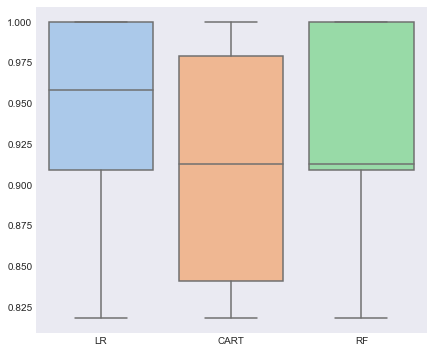

In [12]:
# boxplot comparing models

results_df = pd.DataFrame(np.asarray(results).T, columns=models_name)

plt.figure(figsize=(7,6))
sns.boxplot(data=results_df, palette='pastel')

From the boxplot, mean cross validation score, and standard deviation cross validation score \
Models that give the best is Logistic Regression

# Train and Test the Model

In [13]:
# train the model

model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [14]:
# prediction on validation set

y_preds = model.predict(X_val)

# evaluating the predictions

print('mean accuracy score:', model.score(X_val, y_val))
print('accuracy score:', accuracy_score(y_val, y_preds))

mean accuracy score: 1.0
accuracy score: 1.0


Text(0.5, 1.0, 'Confusion Matrix')

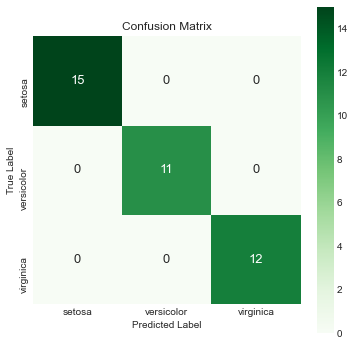

In [15]:
# confusion matrix

conf_matrix = confusion_matrix(y_val, y_preds)

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, square=True, annot_kws=dict(fontsize=13), cmap='Greens',
           xticklabels=['setosa', 'versicolor', 'virginica'], yticklabels=['setosa', 'versicolor', 'virginica'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

In [16]:
# classification report

print(classification_report(y_val, y_preds))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38

